In this notebook, we will explore our preprocessed dataset.  We will analyze the data for outliers, correlated features, and merits in features against the selected features the model outputs.  We will use different feature selection methods such as PCA, Forward/Backward selection, and Decision Trees; and will determine which features we can exclude based on the results and error rate.  We want to train our models only on the features most important to determining the popularity of the song per genre (with the exception of Decision Tree since it performs its own feature selection).

We use kMeans to explore how well kMeans could predict a song's popularity based on its features and perhaps even if it can cluster songs into genres based on the track's features.

This data has been preprocessed and does not contain null values.

In [2]:
import pandas as pd
import numpy as np

In [3]:
popular_data = pd.read_csv('./data/PopularData.csv')

In [4]:
popular_data.head(3)

,SpotifyTrack,SpotifyArtist,uri,year,genre,release_date,popular,key,explicit,mode,...,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,time_signature
0,The Good Stuff,Kenny Chesney,spotify:track:1sR3kJi14jA8Gau3a0yXAo,2002,Country,4/2/2002,1,7,0,1,...,0.612,0.620,200440,0.00000,0.502,143.780,0.129,-9.785,0.0645,4
1,Drive (For Daddy Gene),Alan Jackson,spotify:track:1FV374EPG5CrjdIbIMLkcv,2002,Country,1/15/2002,1,11,0,1,...,0.713,0.579,242733,0.00000,0.511,125.179,0.174,-8.066,0.0413,4
2,Living And Living Well,George Strait,spotify:track:3YxKqZFpcxBPvpUssL8FS2,2002,Country,1/1/2001,1,1,0,1,...,0.602,0.683,218307,0.00338,0.522,120.787,0.110,-6.820,0.0304,4


## Analyze data for outliers

In [4]:
print(popular_data.shape)
popular_data.describe()

(5655, 22)


,year,popular,key,explicit,mode,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,time_signature
count,5655.000000,5655.0,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.00000,5655.000000
mean,2012.560743,1.0,5.321662,0.225464,0.659240,41.484704,0.207662,0.660912,0.683874,229145.221043,0.063507,0.580522,121.437516,0.171417,-5.894027,0.09101,3.939876
std,5.021230,0.0,3.597298,0.417925,0.474007,27.327290,0.208004,0.128686,0.153107,44091.232698,0.207379,0.223677,29.559015,0.129147,2.106324,0.09374,0.326183
min,2002.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000072,0.201000,0.064500,78200.000000,0.000000,0.038300,48.718000,0.014800,-19.727000,0.02270,1.000000
25%,2009.000000,1.0,2.000000,0.000000,0.000000,19.000000,0.040500,0.575000,0.577000,200980.000000,0.000000,0.410500,96.990000,0.090350,-7.027500,0.03450,4.000000
50%,2013.000000,1.0,5.000000,0.000000,1.000000,37.000000,0.133000,0.670000,0.699000,225205.000000,0.000000,0.588000,119.966000,0.121000,-5.632000,0.04890,4.000000
75%,2017.000000,1.0,8.000000,0.000000,1.000000,61.000000,0.322000,0.753000,0.804500,251353.000000,0.000035,0.760000,141.583000,0.216000,-4.430500,0.10200,4.000000
max,2020.000000,1.0,11.000000,1.000000,1.000000,100.000000,0.985000,0.974000,0.993000,992160.000000,0.961000,0.982000,214.025000,0.984000,-0.025000,0.59700,5.000000


In [5]:
raw_data = pd.read_csv('./data/rawData_final.csv')

In [6]:
raw_data.head(3)

,year,genre,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,2016,jazz,0,0,0.6770,0.566,0.468,0.094330,0.000025,0.718,...,0,0,1,0,0,1,0,0,1,0
1,2017,latin,0,0,0.0317,0.709,0.744,0.166493,0.000000,0.314,...,0,0,0,1,0,1,0,0,1,0
2,2017,latin,0,0,0.3920,0.787,0.732,0.143168,0.000003,0.897,...,0,0,1,0,0,1,0,0,1,0


In [7]:
print(raw_data.shape)
raw_data.describe(include='all').T

(23127, 34)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,23127,NaN,NaN,NaN,2011.24,5.42064,2002,2007,2011,2016,2020
genre,23127,5,r&b,5233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,23127,NaN,NaN,NaN,0.244476,0.429785,0,0,0,0,1
chartrank,23127,NaN,NaN,NaN,10.1429,22.372,0,0,0,0,100
acousticness,23127,NaN,NaN,NaN,0.292056,0.283272,2.05e-06,0.0513,0.193,0.4785,0.996
danceability,23127,NaN,NaN,NaN,0.622599,0.143972,0.0917,0.526,0.631,0.729,0.976
energy,23127,NaN,NaN,NaN,0.623486,0.206216,0.00154,0.493,0.652,0.783,0.997
duration_ms,23127,NaN,NaN,NaN,0.130604,0.0432525,0,0.107969,0.125852,0.14664,1
instrumentalness,23127,NaN,NaN,NaN,0.0895416,0.242499,0,0,2.14e-06,0.0007815,0.988
valence,23127,NaN,NaN,NaN,0.532651,0.238052,0.0266,0.344,0.534,0.725,0.983


We have a total of 17,473 track objects, 5,654 of which are our 'popular' (aka target) tracks.  The total number of tracks per genre is distributed within a few standard deviations of one another.  The average amount of tracks per genre is 4,625.  The pop genre has the lowest count with 4,158 tracks.  The r&b genre has the highest count at 5,233 tracks.

In [8]:
print("Unpopular & popular counts:\n", raw_data.popular.value_counts())

Unpopular & popular counts:
 0    17473
1     5654
Name: popular, dtype: int64


In [9]:
print("Tracks per genre count:\n", raw_data.genre.value_counts())
print("\nMean distribution of tracks per genre: ", (raw_data.genre.value_counts().sum())/(raw_data.genre.value_counts().shape[0]))

Tracks per genre count:
 r&b        5233
country    4739
latin      4709
jazz       4288
pop        4158
Name: genre, dtype: int64

Mean distribution of tracks per genre:  4625.4


In [10]:
# Standard deviation of tracks per genre
raw_data.genre.value_counts().std()

424.66845891824835

<AxesSubplot:>

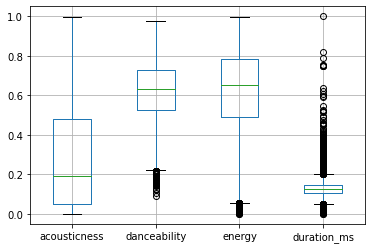

In [11]:
raw_data.boxplot(column=['acousticness', 'danceability', 'energy', 'duration_ms'])


<AxesSubplot:>

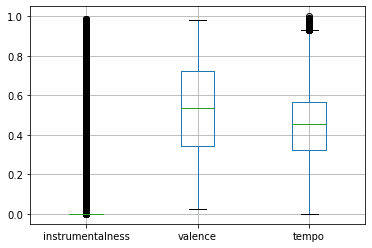

In [12]:
raw_data.boxplot(column=['instrumentalness', 'valence', 'tempo'])


<AxesSubplot:>

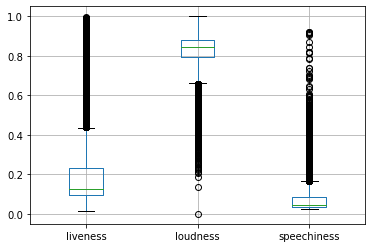

In [13]:
raw_data.boxplot(column=['liveness', 'loudness', 'speechiness'])


<AxesSubplot:>

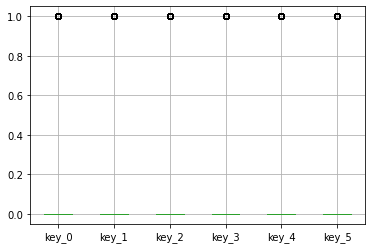

In [14]:
raw_data.boxplot(column=['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5'])

<AxesSubplot:>

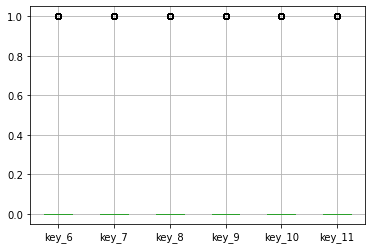

In [15]:
raw_data.boxplot(column=['key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', ])

<AxesSubplot:>

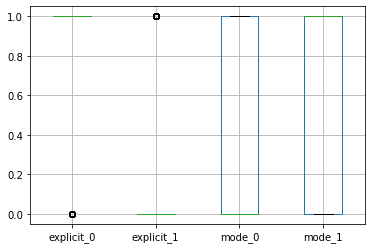

In [16]:
raw_data.boxplot(column=['explicit_0', 'explicit_1', 'mode_0', 'mode_1'])


<AxesSubplot:>

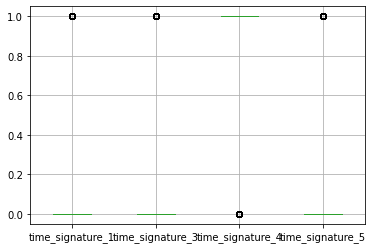

In [17]:
raw_data.boxplot(column=['time_signature_1', 'time_signature_3', 'time_signature_4','time_signature_5'])


## Analyze data for correlated features

In [18]:
pd.options.display.max_columns = 40
raw_data.corr()

,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.000000,0.138451,0.130752,-0.002452,0.046851,-0.021573,-0.167721,0.067053,-0.103803,0.021754,-0.023592,0.002073,0.049199,-0.002263,0.015966,-0.032831,-0.004625,-0.008777,0.001609,0.026043,-0.015778,0.010659,-0.016223,0.015503,0.016352,-0.160330,0.160330,0.038952,-0.038952,0.022530,0.021820,-0.024109,-0.004779
popular,0.138451,1.000000,0.797029,-0.169428,0.151191,0.166754,-0.052411,-0.061045,0.114409,0.032547,-0.065085,0.220876,0.053378,-0.015835,0.019332,-0.001087,-0.009668,-0.011430,0.001985,0.002094,-0.016264,0.021887,-0.015486,0.010748,0.016039,-0.120955,0.120955,-0.004908,0.004908,-0.009251,-0.021057,0.020957,0.001589
chartrank,0.130752,0.797029,1.000000,-0.144451,0.115322,0.136503,-0.058011,-0.099075,0.082280,0.033867,-0.040205,0.191342,0.082973,-0.013688,0.018005,-0.002551,-0.005895,-0.003360,0.000406,0.007925,-0.014646,0.013317,-0.010427,0.004846,0.009019,-0.142394,0.142394,-0.010256,0.010256,-0.000972,0.001475,-0.000855,-0.000557
acousticness,-0.002452,-0.169428,-0.144451,1.000000,-0.209523,-0.660217,0.020545,0.226459,-0.218070,-0.115901,-0.070233,-0.568515,-0.126149,0.039998,-0.073837,0.001789,0.061509,0.010325,0.039661,-0.034303,0.015086,-0.011588,0.008964,0.019415,-0.061004,0.139627,-0.139627,-0.046240,0.046240,0.030794,0.191595,-0.187576,0.016498
danceability,0.046851,0.151191,0.115322,-0.209523,1.000000,0.166004,-0.103111,-0.077973,0.433544,-0.148001,-0.133937,0.213652,0.169115,-0.026090,0.072236,-0.027590,-0.047143,-0.043062,-0.007849,0.017933,-0.022289,0.015157,-0.009861,0.032229,0.034267,-0.211484,0.211484,0.127450,-0.127450,-0.045260,-0.183928,0.208624,-0.080495
energy,-0.021573,0.166754,0.136503,-0.660217,0.166004,1.000000,-0.066631,-0.216517,0.456319,0.158591,0.135999,0.758895,0.114181,-0.042096,0.031699,0.012795,-0.042484,0.003595,-0.026451,0.018111,-0.012146,0.003228,0.001124,-0.007765,0.053954,-0.025200,0.025200,0.033573,-0.033573,-0.035892,-0.204070,0.204081,-0.026750
duration_ms,-0.167721,-0.052411,-0.058011,0.020545,-0.103111,-0.066631,1.000000,0.129611,-0.166101,-0.031343,0.066335,-0.097962,-0.046720,0.008103,0.007667,0.009259,0.012673,-0.020157,0.034351,-0.018302,-0.005728,-0.005835,-0.011605,-0.014414,0.001032,0.003488,-0.003488,0.057073,-0.057073,-0.031908,-0.026305,0.033703,-0.003129
instrumentalness,0.067053,-0.061045,-0.099075,0.226459,-0.077973,-0.216517,0.129611,1.000000,-0.084400,-0.092717,-0.043328,-0.457803,-0.121866,0.010065,-0.023444,-0.000572,0.016227,-0.013213,0.046110,-0.021020,0.009452,-0.006836,-0.013367,0.018726,-0.020568,0.143067,-0.143067,0.100709,-0.100709,0.019908,0.036926,-0.039173,0.000969
valence,-0.103803,0.114409,0.082280,-0.218070,0.433544,0.456319,-0.166101,-0.084400,1.000000,0.064667,-0.004543,0.321009,0.075949,-0.015091,-0.004774,-0.009778,-0.016717,-0.014916,0.012240,0.000384,0.005456,-0.001464,0.006941,0.017789,0.016648,0.075448,-0.075448,0.037845,-0.037845,-0.016496,-0.100361,0.106037,-0.029137
tempo,0.021754,0.032547,0.033867,-0.115901,-0.148001,0.158591,-0.031343,-0.092717,0.064667,1.000000,0.024525,0.149094,0.060678,0.007490,-0.001627,0.010594,0.002791,0.023215,-0.028198,-0.005401,0.007594,0.014310,-0.001872,-0.031658,0.002043,-0.016518,0.016518,-0.049382,0.049382,-0.025230,0.066462,-0.046767,-0.016710


In [6]:
# Find significant correlations
data_corr_df = pd.DataFrame(raw_data.corr(), copy=True)
data_corr_df.where(data_corr_df > 0.5)

,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.797029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.797029,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We didn't find many features that are significantly correlated to "popularity" other than "chartrank", but that "chartrank" feature is expected to be correlated and therefore not insightful in this case.  The only significant correlations to note are "energy" and "loudness" within all the data.

Let's see if we can find more correlations when we separate the data by genre.

In [7]:
data_per_genre = raw_data.groupby('genre')

In [8]:
for genre in raw_data.genre.unique():
    print("Genre ", genre)
    abs_corr = np.abs(data_per_genre.get_group(genre).corr())
    display(abs_corr.where(abs_corr > 0.5))
    print()

Genre  jazz


,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.836895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.836895,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.000000,NaN,0.754809,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.579829,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,0.754809,NaN,1.000000,NaN,NaN,0.583129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,0.579829,0.583129,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Genre  latin


,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.817225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.817225,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Genre  pop


,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.849299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.849299,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.00000,NaN,0.649430,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,0.64943,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Genre  r&b


,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.814749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.814749,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Genre  country


,year,popular,chartrank,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,...,key_10,key_11,explicit_0,explicit_1,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popular,NaN,1.000000,0.797394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chartrank,NaN,0.797394,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.000000,NaN,0.694685,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,0.694685,NaN,1.000000,NaN,NaN,0.512047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,0.512047,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since we know ("popularity", "chartrank") & ("energy", "loudness") correlations are present everywhere, we will omit its mention any further in the analysis of the genre feature correlations below.


The Jazz genre's "valence" & "danceability" features are somewhat correlated. There's a correlation between the "valence" & "energy" features; "energy" & "acousticness"; "loudness" & "acousticness"; and "time_signature_3" & "time_signature_4".

Latin genre had a correlation between "time_signature_3" & "time_signature_4".

Pop genre correlations: "energy" & "acousticness"; "time_signature_3" & "time_signature_4".

R&B genre had a correlation between "time_signature_3" & "time_signature_4".

Country genre correlation between the "valence" and "energy" features;  "energy" & "acousticness"; "loudness" & "acousticness"; "time_signature_3" & "time_signature_4".

## Use Feature Selection methods to determine which features are most important to determining popularity of the song per genre

Now that we've analyzed the correlations in our features, let's separate the target feature from the training set.

In [16]:
data_copy = pd.DataFrame(raw_data, copy=True)

Since we know chart rank is correlated to popularity, and we want to base our predictions based on song features, we will drop the 'chartrank' column from our training data

In [17]:
data_copy = data_copy.drop(columns=['chartrank'])

(23127, 34)
(23127, 33)


Training data will consist of songs prior to 2019, a total of 20,618 tracks.  Test data will consist of songs in 2019 & 2020, summing up to 2,509 tracks.  Roughly 12% of our raw data is for testing.

In [26]:
train_matrix = data_copy[data_copy['year'] < 2019]
train_target = train_matrix.pop("popular")
test_matrix = data_copy[data_copy['year'] >= 2019]
test_target = test_matrix.pop("popular")

# Testing on all genres
train_all = pd.DataFrame(train_matrix, copy=True)
train_all = train_all.drop(columns=["genre"])
test_all = pd.DataFrame(test_matrix, copy=True)
test_all = test_all.drop(columns=['genre'])

(20618, 32)
(20618,)


In [114]:
data_by_genre = data_copy.groupby('genre')

genres_train = []  # dataframes per genre for years < 2019
genres_train_targets = []
genres_test = []   # dataframes per genre for year >= 2019
genres_test_targets = []

for name, obj in data_by_genre.__iter__():
    print("Genre: ", name)
    # display(obj)
    # Create a copy of the df
    copy_genre_matrix = pd.DataFrame(obj, copy=True)
    # Drop "genre" column because we want to train/test on numerical values only
    copy_genre_matrix = copy_genre_matrix.drop(columns=['genre'])
    # Split training & testing data based on year 
    genre_train = copy_genre_matrix[copy_genre_matrix['year'] < 2019]
    genre_test = copy_genre_matrix[copy_genre_matrix['year'] >= 2019]
    # Separate target column
    genre_train_target = genre_train.pop('popular')
    genre_test_target  = genre_test.pop('popular')
    # Gather newly created training & testing datasets
    genres_train.append(genre_train)
    genres_train_targets.append(genre_train_target)
    genres_test.append(genre_test)
    genres_test_targets.append(genre_test_target)
    
    print(f"Tracks per {name} genre: ", genres_train_targets.value_counts())
    

Genre:  country
Genre:  jazz
Genre:  latin
Genre:  pop
Genre:  r&b


Multiple methods will be implemented to test the parameters that yield the highest accuracy per model, as well as visualize the cross-validation score on a more granular level: per-parameter basis.

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [178]:
import matplotlib.pyplot as plt

def plot_params(param_values, param_name, train_scores, test_scores):
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

In [68]:
def best_params(x, y, model, params, scoring, k):
    grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=k, return_train_score=True)
    grid.fit(x, y)

    return grid

In [190]:
def plot_best_param(x, y, model, param_name, param_values, k):
    params = dict([(param_name, param_values)])
    grid = GridSearchCV(model, param_grid=params, cv=k, n_jobs=-1, return_train_score=True)
    grid.fit(x, y)
    print(grid.best_params_)
    plot_params(param_values, param_name, grid.cv_results_['mean_train_score'], grid.cv_results_['mean_test_score'])
    

### Decision Trees
One of the easiest and most efficient ways to determine feature selection is by using Decision Trees.  We will start by analyzing all the features for all the tracks.  Then, we will test different parameters and will use the parameters that yield the highest accuracy on our model.  Finally, we will see if we could improve our accuracy by repeating this process on a more granular level - separating tracks by genre.

In [60]:
from sklearn import tree

In [70]:
treeclf = tree.DecisionTreeClassifier()
depths = np.arange(1, 15)
splits_parent = np.arange(20, 200, 20)
splits_leaf = np.arange(5, 100, 5)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': depths,
    'min_samples_split': splits_parent,
    'min_samples_leaf': splits_leaf
}

# WARNING: Takes several minutes to generate
grid = best_params(train_all, train_target, treeclf, parameters, scoring, kfold)


In [72]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=140)

In [73]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 140}

In [75]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099237,0.019428,0.003891,0.001204,gini,5,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.689864,...,0.708698,0.034360,577,0.777495,0.772766,0.774827,0.777145,0.776417,0.775730,0.001743
1,0.085947,0.000435,0.003482,0.000335,gini,5,5,40,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.689864,...,0.708698,0.034360,577,0.777495,0.772766,0.774827,0.777145,0.776417,0.775730,0.001743
2,0.106262,0.017131,0.006515,0.003508,gini,5,5,60,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.687439,...,0.708213,0.034638,604,0.777192,0.772766,0.774827,0.777145,0.776417,0.775669,0.001685
3,0.098422,0.010971,0.003381,0.000181,gini,5,5,80,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.687439,...,0.708359,0.034793,591,0.777192,0.772584,0.774827,0.777145,0.776417,0.775633,0.001748
4,0.085578,0.000637,0.003359,0.000104,gini,5,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.687439,...,0.708359,0.034793,591,0.777192,0.772584,0.774827,0.777145,0.776417,0.775633,0.001748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.190827,0.011180,0.003924,0.000041,entropy,14,95,100,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.663434,...,0.679793,0.032099,2260,0.789924,0.790409,0.789196,0.793271,0.786178,0.789795,0.002277
3416,0.188023,0.011792,0.003913,0.000027,entropy,14,95,120,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.663434,...,0.679793,0.032099,2260,0.789924,0.790409,0.789196,0.793271,0.786178,0.789795,0.002277
3417,0.188415,0.013034,0.003947,0.000033,entropy,14,95,140,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.663434,...,0.679793,0.032099,2260,0.789924,0.790409,0.789196,0.793271,0.786178,0.789795,0.002277
3418,0.188624,0.011564,0.003931,0.000023,entropy,14,95,160,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.663434,...,0.679793,0.032099,2260,0.789924,0.790409,0.789196,0.793271,0.786178,0.789795,0.002277


Though we were able to get the best parameters all at once, let's plot one of those parameter ranges to 
1. better understand the reasoning behind our model's selection; and
2. confirm there aren't better parameters to choose from.

For now, let's plot the cross-validation against the max depth parameter range.

Later we'll plot the other 2 parameter ranges: min samples split & min samples leaf.

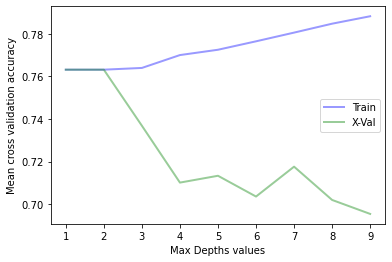

In [189]:
depths2 = np.arange(1, 10)
treeclf2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=140, min_samples_leaf=20)
parameters2 = {
    'max_depth': depths2
}
grid2 = GridSearchCV(estimator=treeclf2, param_grid=parameters2, n_jobs=-1, cv=5, return_train_score=True)
grid2.fit(train_all, train_target)
plot_params(depths2, 'Max Depths', grid2.cv_results_['mean_train_score'], grid2.cv_results_['mean_test_score'])


In [185]:
grid2.best_params_

{'max_depth': 1}

The plot suggests that a max-depth of 1 is sufficient for returning the highest accuracy.  We need to find out which feature the DT is splitting on and analyze its merits.  Let's create a Decision Tree model with the suggested min_samples_split & min_samples_leaf values, & set the max_depth at the 3rd highest accuracy rate to get more variance.  Them, we'll analyze the classification report to determine how well our model is doing in both precision and recall using those "best" parameters.

In [82]:
dt_all = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=140, min_samples_leaf=20)
dt_all.fit(train_all, train_target)
print(dt_all.score(train_all, train_target))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=140)

In [94]:
from sklearn.metrics import classification_report

0.7725773595887089


In [92]:
dt_all_pred = dt_all.predict(test_all)
print(classification_report(test_target, dt_all_pred))


              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1739
           1       0.74      0.06      0.12       770

    accuracy                           0.71      2509
   macro avg       0.72      0.53      0.47      2509
weighted avg       0.72      0.71      0.61      2509



As we can see from our low recall score for classifying 'popular', our decision tree model performs worse than randomly guessing at predicting popular track features.  The 71% accuracy stems from it's better ability to predict unpopular tracks.

In [95]:
from sklearn.metrics import confusion_matrix

In [97]:
treecm = confusion_matrix(test_target, dt_all_pred)
treecm

array([[1722,   17],
       [ 721,   49]])

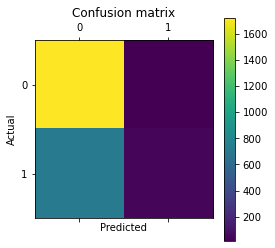

In [98]:
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Let's see which features were used in our Decision Tree model.

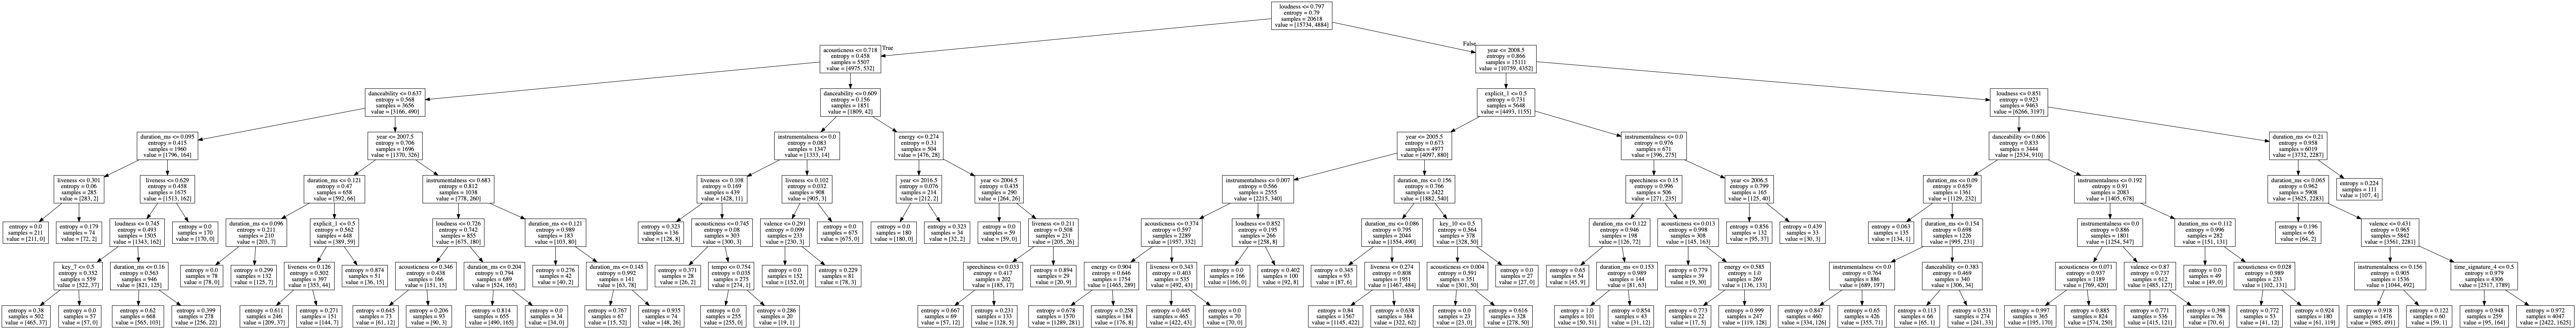

In [170]:
from sklearn.tree import export_graphviz
from IPython.display import Image

def display_model(dot_filename, png_filename, model, columns):
    export_graphviz(model, out_file=dot_filename, feature_names=columns)
    # system(dot -Tpng DT_all_genres.dot -o dtree.png)
    %alias sys_syntax dot -Tpng %s -o %s
    %sys_syntax $dot_filename $png_filename
    return Image(filename=png_filename, width=800)
    
display_model('DT_all_genres.dot', 'dtree.png', dt_all, train_all.columns)

In [157]:
dt_all.n_features_

31

Based on all the genres and all the features, our Decision Tree selected 'loudness' as the most informational feature to split on.  In the 2nd level, it split on 'acousticness' and 'year'. We can dismiss the 'year' feature since our data aims to predict popularity based on audio features. At the 3rd level, it splits on 'explicit_1', 'danceability', and 'loudness' again.

Using these best params, we can next test on max_features and assign a min_impurity_decrease value to help prune off features that don't return more information.


In [159]:
dt_pruned = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=140, min_samples_leaf=20)
depths = np.arange(1, 7)
n_features = np.arange(1, 15)
split_on_impurity = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

parameters = {
    'max_depth': depths,
    'max_features': n_features,
    'min_impurity_decrease': split_on_impurity
}

dt_grid2 = best_params(train_all, train_target, dt_pruned, parameters, scoring, kfold)


In [160]:
dt_grid2.best_params_

{'max_depth': 1, 'max_features': 1, 'min_impurity_decrease': 0.01}

Let's see if our Decision Tree model improves if we fit it on a per-genre basis.  We will re-evaluate the previous parameters in order to better fit our smaller datasets.  First, we'll observe each parameter range individually for cross-validation scores.  Then we'll test on all the parameters to get the best combination of parameters.

{'max_depth': 2}


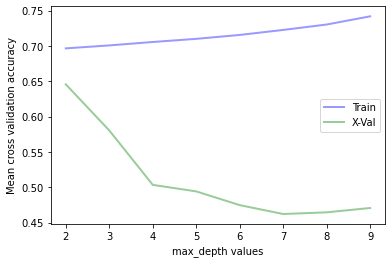

In [142]:
genre_dt = tree.DecisionTreeClassifier(criterion='entropy')
depths = np.arange(2,10)
plot_best_param(genres_train[0], genres_train_targets[0], genre_dt, 'max_depth', depths, 10)


{'min_samples_split': 60}


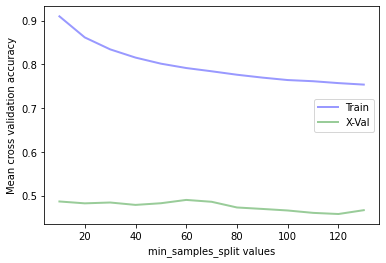

In [186]:
genre_dt = tree.DecisionTreeClassifier(criterion='entropy')
splits_parent = np.arange(10, 140, 10)
plot_best_param(genres_train[0], genres_train_targets[0], genre_dt, 'min_samples_split', splits_parent, 10)


{'min_samples_leaf': 11}


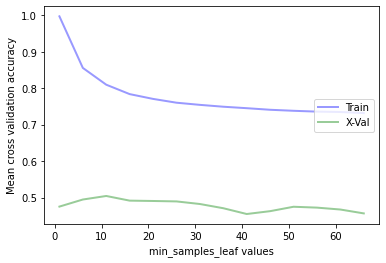

In [187]:
splits_leaf = np.arange(1, 70, 5)
plot_best_param(genres_train[0], genres_train_targets[0], genre_dt, 'min_samples_leaf', splits_leaf, 10)


In [152]:
depths = np.arange(1, 7)
splits_parent = np.arange(10, 100, 10)
splits_leaf = np.arange(1, 40, 5)

parameters = {
    'max_depth': depths,
    'min_samples_split': splits_parent,
    'min_samples_leaf': splits_leaf
}

grid = best_params(genres_train[0], genres_train_targets[0], genre_dt, parameters, scoring, kfold)


In [153]:
grid.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [161]:
depths = np.arange(1, 5)
n_features = np.arange(1, 5)
split_on_impurity = [0.01, 0.05, 0.1, 0.2]
splits_parent = np.arange(5, 105, 25)
splits_leaf = np.arange(1, 40, 5)

parameters = {
    'max_depth': depths,
    'min_samples_split': splits_parent,
    'min_samples_leaf': splits_leaf,
    'max_features': n_features,
    'min_impurity_decrease': split_on_impurity
}

dt_grid3 = best_params(genres_train[0], genres_train_targets[0], genre_dt, parameters, scoring, kfold)


In [162]:
dt_grid3.best_params_

{'max_depth': 1,
 'max_features': 1,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

Genre:  country
Number of features used:  15
Predictions on test set:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       321
           1       0.00      0.00      0.00       197

    accuracy                           0.62       518
   macro avg       0.31      0.50      0.38       518
weighted avg       0.38      0.62      0.47       518



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


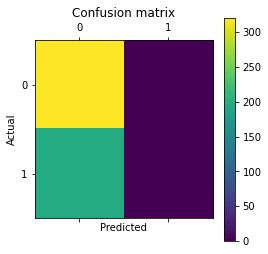

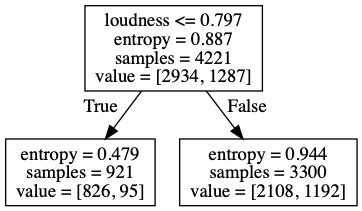

Genre:  jazz
Number of features used:  15
Predictions on test set:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       357
           1       0.00      0.00      0.00        96

    accuracy                           0.79       453
   macro avg       0.39      0.50      0.44       453
weighted avg       0.62      0.79      0.69       453



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


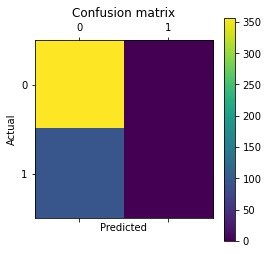

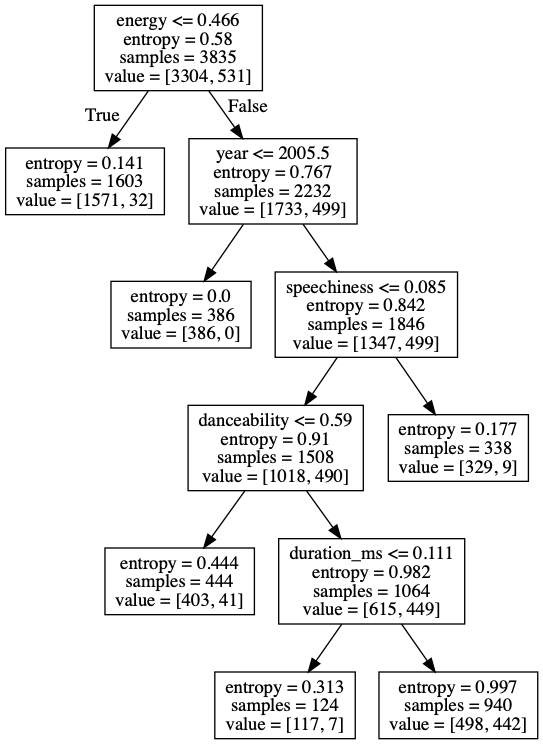

Genre:  latin
Number of features used:  15
Predictions on test set:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       325
           1       0.77      0.09      0.16       188

    accuracy                           0.66       513
   macro avg       0.71      0.54      0.47       513
weighted avg       0.70      0.66      0.56       513



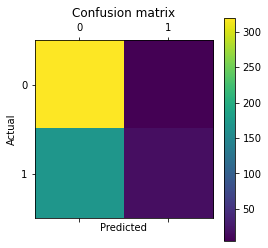

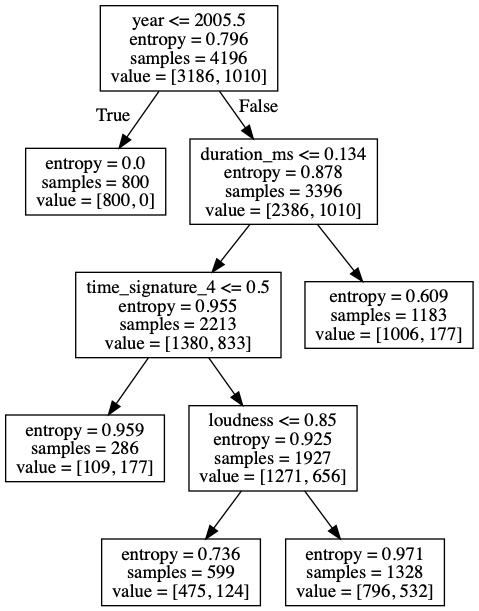

Genre:  pop
Number of features used:  15
Predictions on test set:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       353
           1       0.00      0.00      0.00        97

    accuracy                           0.78       450
   macro avg       0.39      0.50      0.44       450
weighted avg       0.62      0.78      0.69       450



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


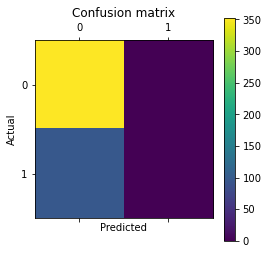

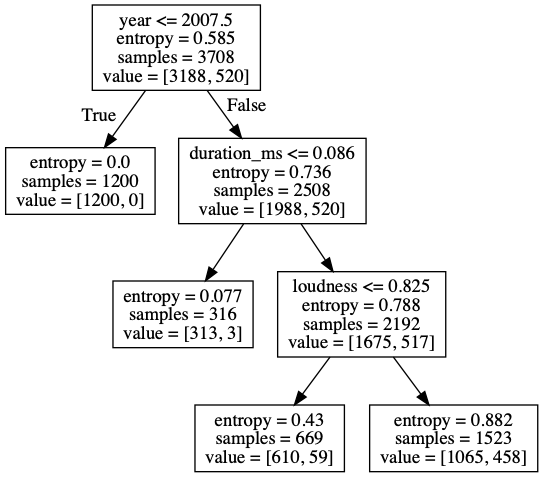

Genre:  r&b
Number of features used:  15
Predictions on test set:


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       383
           1       0.63      0.55      0.59       192

    accuracy                           0.74       575
   macro avg       0.71      0.69      0.70       575
weighted avg       0.74      0.74      0.74       575



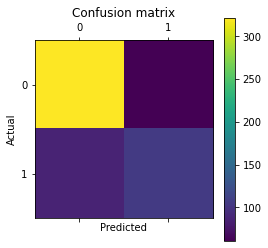

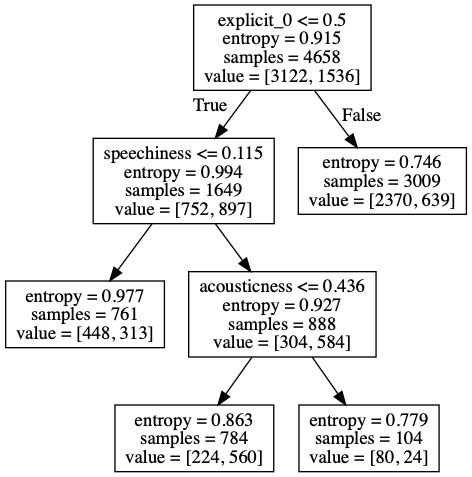

In [176]:

for name, obj in data_by_genre.__iter__():
    print("Genre: ", name)
    # display(obj)
    # Create a copy of the df
    copy_genre_matrix = pd.DataFrame(obj, copy=True)
    # Drop "genre" column because we want to train/test on numerical values only
    copy_genre_matrix = copy_genre_matrix.drop(columns=['genre'])
    # Split training & testing data based on year 
    genre_train = copy_genre_matrix[copy_genre_matrix['year'] < 2019]
    genre_test = copy_genre_matrix[copy_genre_matrix['year'] >= 2019]
    # Separate target column
    genre_train_target = genre_train.pop('popular')
    genre_test_target  = genre_test.pop('popular')
    # Create a classifier with the best params
    dt_per_genre = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.01, max_features=0.5)
    # Fit the classifier with our data per genre
    dt_per_genre.fit(genre_train, genre_train_target)
    print("Number of features used: ", dt_per_genre.max_features_)

    # Predict on test set
    dt_predict_per_genre = dt_per_genre.predict(genre_test)
    #print("Predictions on test set:")
    #display(dt_predict_per_genre)
    # Analyze how well our Decision Tree can predict popularity
    print(classification_report(genre_test_target, dt_predict_per_genre))
    # Confusion matrix
    dt_genre_cm = confusion_matrix(genre_test_target, dt_predict_per_genre)
    # Plot the confusion matrix
    %matplotlib inline
    plt.matshow(dt_genre_cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Display Tree
    if name == "r&b":
        name = "rnb"
    dot_filename = f'{name}_DT.dot'
    png_filename = f'{name}_tree.png'
    display(display_model(dot_filename, png_filename, dt_per_genre, genre_train.columns))

    

- The DT for the 'Country' genre failed to predict any potentially popular country tracks (precision = 0) and had a mediocre score for predicting unpopular tracks with a precision of 0.62.  The only feature it split on was on 'loudness'.
- Jazz failed to predict any potentially popular jazz tracks (precision = 0) and had a better score for predicting unpopular tracks with a precision of 0.79.  The jazz DT calculated 'energy', 'year', 'speechiness', 'danceability', & 'duration' as the features with the highest entropy.
- The Latin DT scored 65% on precision rate for unpopular predicted tracks & a 77% precision rate for predicted popular tracks.  However, the recall for predicting popularity is 9%, which means our model is not very accurate at detecting True Positives, & is therefore incomplete.  The features selected here were year, duration_ms, time_signature_4, & loudness. 
- Pop failed to predict any potentially popular pop tracks (precision = 0) and had a better score for predicting unpopular tracks with a precision of 0.78.  The features selected here were year, duration_ms, & loudness. 
- Finally, R&B had better luck with predictions with an 79% precision rate for unpopular tracks and 63% precision rate for predicted popular R&B tracks.  It's recall was 55% for predicted popular tracks, thus making it no better than a random 50/50 guessing.  The features selected here were explicit_0, speechiness, & acousticness.


Overall, our accuracy only improved in the Jazz, Pop, & R&B genres compared to the DT model based on all audio features across all genres.
Only in the R&B genre did we improve our recall score, which was still no better than guessing. 

### K Nearest Neighbors
First, we'll test on all the tracks for all genres using K Nearest Neighbor as our classifier with Euclidean distance as our distance metric.  

Then, we will do a grid search on the best 'k'.

Later, we will analyze the classifier more granularly, on a genre-by-genre case.

In [29]:
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier


Let's evaluate the best number of nearest neighbors to optimize our knn prediction.

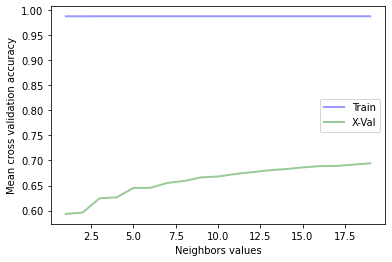

In [66]:
ks = np.arange(1,20)
parameters = {
    'n_neighbors': ks,
    'weights': ['distance'],
    'p': [2]
}
kfold = 5
scoring = 'accuracy'
knn = KNeighborsClassifier()

grid = best_params(train_all, train_target, knn, parameters, scoring, kfold)
# Plot the error values on the training and cross-validation 
# splits across the specified values of the main parameter to test on.
plot_params(ks, 'Neighbors', grid.cv_results_['mean_train_score'], grid.cv_results_['mean_test_score'])


The elbow is at roughly 7 neighbors.

In [188]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', p=2)
knn.fit(train_all, train_target)
knnpreds_test = knn.predict(test_all)

Let's evaluate our classifier's accuracy on its 2019-2020 popularity predictions based on audio features:

In [44]:
print(classification_report(test_target, knnpreds_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1739
           1       0.40      0.36      0.38       770

    accuracy                           0.63      2509
   macro avg       0.56      0.56      0.56      2509
weighted avg       0.63      0.63      0.63      2509



Though our f1-score is worse than the f1-score of our decision tree, our recall for predicted popularity is much higher!

### Backward Selection

Since we don't have too many features, we'll start with a Backward-SFS to find features that will give us the most information when attempting to predict popularity.  We'll start by using the K Nearest Neighbors classifier as our model to test on for finding the elbow of a sequentially ordered k-valued array for our Backward Feature Selection model to choose on. 

<font color='red'> Unable to use the SequentialFeatureSelector method because it was introduced in scikit-learn version 0.24.  Anaconda's environment is running on version 0.23.3, without an option to update.</font>

https://scikit-learn.org/stable/modules/feature_selection.html 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector 

In [181]:
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=5)
sfs = feature_selection.SequentialFeatureSelector(knn, n_features_to_select=5)
sfs.fit(train_all, train_target)
sfs.get_params()


AttributeError: module 'sklearn.feature_selection' has no attribute 'SequentialFeatureSelector'

## Cluster Analysis

### DBSCAN

So far, our models have failed to return a satisfactory accuracy score to predict audio features that would indicate a 'popular' track.  Instead, we may find better luck in detecting a genre based on audio features.  We will use the density based clustering method (DBSCAN) to predict a track's genre.  DBSCAN is useful in detecting outliers as well, which will be interesting to visualize if our results are meaningful.

We use DBSCAN instead of kMeans because
1. DBSCAN is better at detecting outliers, resulting in better, more 'complete' clusters. In other words, we reduce the noise that would've otherwise been seen in kMeans.
2. Unlike kMeans, DBSCAN doesn't assume clusters are convex shaped.

We remove the 'year' feature since it should be irrelavant to genre prediction.  
Our classification methods proved 'duration' to be more useful than we had initially imagined, in particular with predicting popularity within the pop, latin, & jazz genres.  This makes sense for the Jazz genre, but we're not sure why that would also apply to the Latin & Pop genres.  Thus, we shall keep this feature in the data to see if it'll add any more insights to our findings.


In [204]:
# We want all the raw_data, except for the popular, chartrank, & year columns.
X = train_matrix.drop(columns=['year'])
X = X.values

# Our target will be the genre feature this time
labels_true = X.pop('genre')
labels_true = labels_true.values


(20618, 30)


In [198]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

Code source below provided by scikit-learn's DBSCAN demo: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py 

In [252]:
def d_cluster_analysis(X, labels_true, epsilons, minSamples):
    est_clusters = []
    h_scores = [] # Homogeneity 
    c_scores = [] # Completeness
    v_scores = [] # Homogeniety + Completeness score

    for e in epsilons:
        for m in minSamples:
            # Compute DBSCAN
            dbs = DBSCAN(eps=e, min_samples=m, n_jobs=-1).fit(X)
            core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
            core_samples_mask[dbs.core_sample_indices_] = True
            labels = dbs.labels_
            print(f'DBSCAN with epsilon value of {e}:')

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            est_clusters.append(n_clusters_)
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)

            # Accuracy Scores
            hscore = metrics.homogeneity_score(labels_true, labels)
            h_score.append(hscore)
            print("Homogeneity: %0.3f" % hscore)
            cscore = metrics.completeness_score(labels_true, labels)
            c_score.append(cscore)
            print("Completeness: %0.3f" % cscore)
            vscore = metrics.v_measure_score(labels_true, labels)
            v_score.append(vscore)
            print("V-measure (Combined Homogeneity & Completeness scores): %0.3f" % vscore)
            print("Adjusted Rand Index: %0.3f"
                  % metrics.adjusted_rand_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.3f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
            print("Silhouette Coefficient: %0.3f"
                  % metrics.silhouette_score(X, labels))

            # Black removed and is used for noise instead.
            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each)
                      for each in np.linspace(0, 1, len(unique_labels))]
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    # Black used for noise.
                    col = [0, 0, 0, 1]

                class_member_mask = (labels == k)

                xy = X[class_member_mask & core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

                xy = X[class_member_mask & ~core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6)

            plt.title('Estimated number of clusters: %d' % n_clusters_)
            plt.show()
            print()
        
    return est_clusters, h_scores, c_scores, v_scores



### min_samples = 10; data = train_matrix

DBSCAN with epsilon value of 0.2:
Estimated number of clusters: 54
Estimated number of noise points: 14118
Homogeneity: 0.061
Completeness: 0.062
V-measure (Combined Homogeneity & Completeness scores): 0.062
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.058
Silhouette Coefficient: -0.315


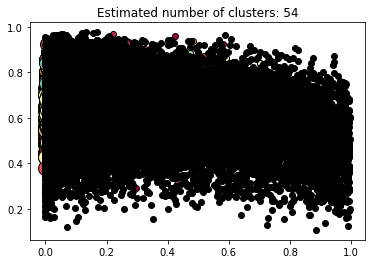


DBSCAN with epsilon value of 0.3:
Estimated number of clusters: 71
Estimated number of noise points: 5793
Homogeneity: 0.103
Completeness: 0.054
V-measure (Combined Homogeneity & Completeness scores): 0.071
Adjusted Rand Index: 0.037
Adjusted Mutual Information: 0.068
Silhouette Coefficient: 0.170


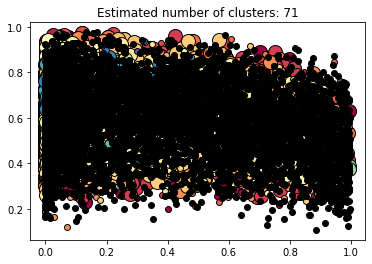


DBSCAN with epsilon value of 0.4:
Estimated number of clusters: 76
Estimated number of noise points: 2339
Homogeneity: 0.103
Completeness: 0.047
V-measure (Combined Homogeneity & Completeness scores): 0.064
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.062
Silhouette Coefficient: 0.389


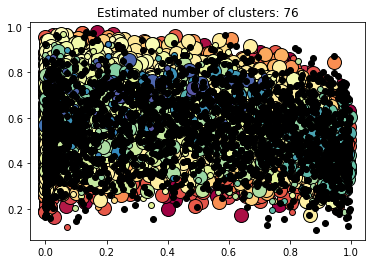

In [ ]:
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
est_clusters, h_scores, c_scores, v_scores = d_cluster_analysis(X, labels_true, eps, [10])

DBSCAN with epsilon value of 0.1 returned 0 clusters, with all points considered "noise points".
DBSCAN with epsilon value of 0.2 returned 54 clusters, with 14,118 considered "noise points".
DBSCAN with epsilon value of 0.3 returned 71 clusters, with 5,793 considered "noise points".
DBSCAN with epsilon value of 0.4 returned 76 clusters, with 2,339 considered "noise points".
DBSCAN with epsilon value of 0.5 returned 69 clusters, with 1,110 considered "noise points".
DBSCAN with epsilon value of 0.6 returned 70 clusters, with 708 considered "noise points".
DBSCAN with epsilon value of 0.7 returned 72 clusters, with 555 considered "noise points".
DBSCAN with epsilon value of 0.8 returned 72 clusters, with 492 considered "noise points".
DBSCAN with epsilon value of 0.9 returned 74 clusters, with 430 considered "noise points".

A small min_sample of 10 returned an average cluster of 62. The range of cluster size for that min sample across an epsilon value between 0.0 & 1.0 was 54 to 74.


In [233]:
def plot_clustering_params(param_values, param_name, h_scores, c_scores, v_scores):
    plt.plot(param_values, h_scores, label='Homogeneity Score', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, c_scores, label='Completeness Score', alpha=0.4, lw=2, c='g')
    plt.plot(param_values, v_scores, label='V-Measure', alpha=0.4, lw=2, c='r')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Accuracy Scores")

### min samples = 50
We know we have at least 3,000 track samples per genre, so let's increase our min_sample to 50. We chose 50 because at 100 we were getting errors.

DBSCAN with epsilon value of 0.2:
Estimated number of clusters: 7
Estimated number of noise points: 19982
Homogeneity: 0.007
Completeness: 0.062
V-measure (Combined Homogeneity & Completeness scores): 0.013
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.013
Silhouette Coefficient: -0.253


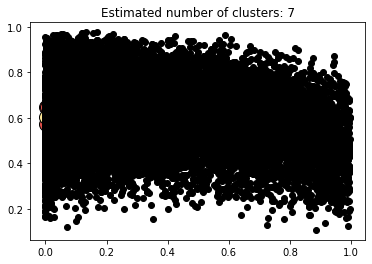


DBSCAN with epsilon value of 0.3:
Estimated number of clusters: 21
Estimated number of noise points: 11388
Homogeneity: 0.063
Completeness: 0.052
V-measure (Combined Homogeneity & Completeness scores): 0.057
Adjusted Rand Index: 0.034
Adjusted Mutual Information: 0.056
Silhouette Coefficient: 0.030


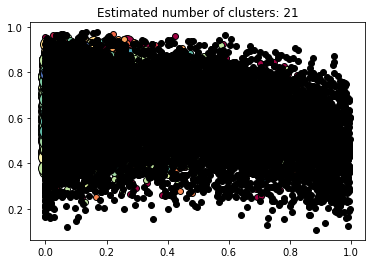


DBSCAN with epsilon value of 0.4:
Estimated number of clusters: 34
Estimated number of noise points: 6070
Homogeneity: 0.084
Completeness: 0.047
V-measure (Combined Homogeneity & Completeness scores): 0.060
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.059
Silhouette Coefficient: 0.286


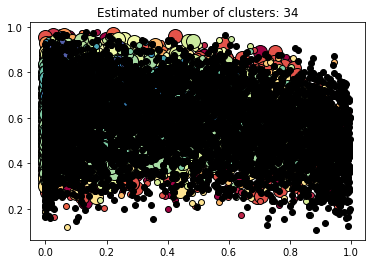


DBSCAN with epsilon value of 0.5:
Estimated number of clusters: 42
Estimated number of noise points: 3475
Homogeneity: 0.087
Completeness: 0.043
V-measure (Combined Homogeneity & Completeness scores): 0.058
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.056
Silhouette Coefficient: 0.409


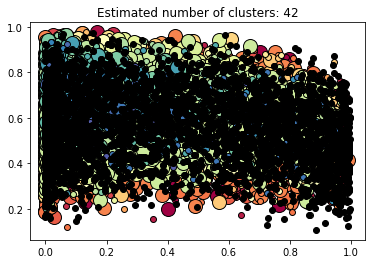


DBSCAN with epsilon value of 0.6:
Estimated number of clusters: 46
Estimated number of noise points: 2077
Homogeneity: 0.083
Completeness: 0.039
V-measure (Combined Homogeneity & Completeness scores): 0.053
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.051
Silhouette Coefficient: 0.465


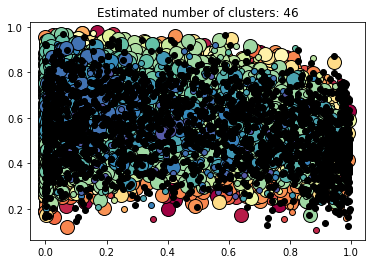


DBSCAN with epsilon value of 0.7:
Estimated number of clusters: 51
Estimated number of noise points: 1327
Homogeneity: 0.081
Completeness: 0.037
V-measure (Combined Homogeneity & Completeness scores): 0.051
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.049
Silhouette Coefficient: 0.491


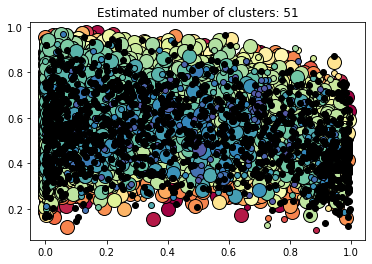


DBSCAN with epsilon value of 0.8:
Estimated number of clusters: 52
Estimated number of noise points: 1100
Homogeneity: 0.082
Completeness: 0.037
V-measure (Combined Homogeneity & Completeness scores): 0.051
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.049
Silhouette Coefficient: 0.499


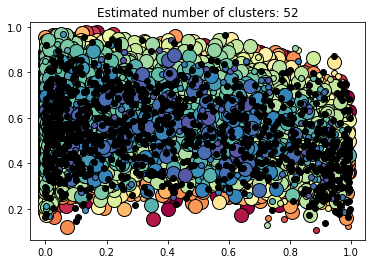


DBSCAN with epsilon value of 0.9:
Estimated number of clusters: 53
Estimated number of noise points: 1013
Homogeneity: 0.082
Completeness: 0.037
V-measure (Combined Homogeneity & Completeness scores): 0.051
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.049
Silhouette Coefficient: 0.503


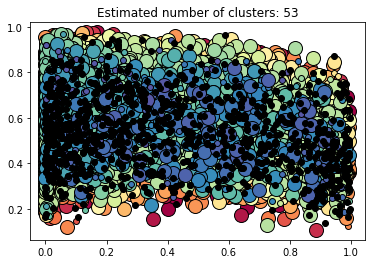


DBSCAN with epsilon value of 1.0:
Estimated number of clusters: 53
Estimated number of noise points: 981
Homogeneity: 0.082
Completeness: 0.037
V-measure (Combined Homogeneity & Completeness scores): 0.051
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.049
Silhouette Coefficient: 0.504


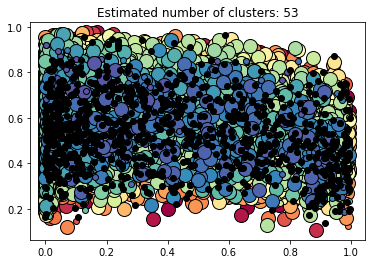


DBSCAN with epsilon value of 2.0:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure (Combined Homogeneity & Completeness scores): 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [237]:
est_clusters, h_scores, c_scores, v_scores = d_cluster_analysis(X, labels_true, eps, [50])

param_name = 'eps'
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0]
est_clusters = []
h_scores = [] # Homogeneity 
c_scores = [] # Completeness
v_scores = [] # Homogeniety + Completeness score

for e in eps:
    # Compute DBSCAN
    dbs = DBSCAN(eps=e, min_samples=50, n_jobs=-1).fit(X)
    core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
    core_samples_mask[dbs.core_sample_indices_] = True
    labels = dbs.labels_
    print(f'DBSCAN with epsilon value of {e}:')
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    est_clusters.append(n_clusters_)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    
    # Accuracy Scores
    hscore = metrics.homogeneity_score(labels_true, labels)
    h_score.append(hscore)
    print("Homogeneity: %0.3f" % hscore)
    cscore = metrics.completeness_score(labels_true, labels)
    c_score.append(cscore)
    print("Completeness: %0.3f" % cscore)
    vscore = metrics.v_measure_score(labels_true, labels)
    v_score.append(vscore)
    print("V-measure (Combined Homogeneity & Completeness scores): %0.3f" % vscore)
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    print()
    


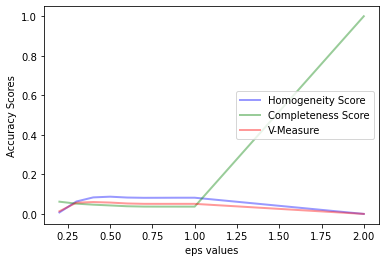

In [242]:
eps_vals = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0] # Only made it this far in the method
plot_clustering_params(eps_vals, param_name, h_score, c_score, v_score)


Text(0, 0.5, 'Estimated Cluster size')

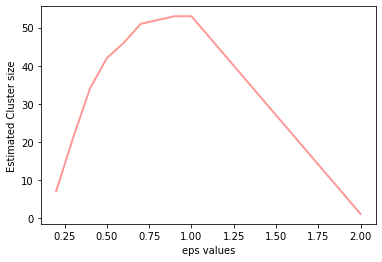

In [245]:
plt.plot(eps_vals, est_clusters, alpha=0.4, lw=2, c='r')
plt.xlabel(param_name + " values")
plt.ylabel("Estimated Cluster size")


As we see in the 1st plot, our accuracy scores did not improve.  The last epsilon value of 2.0 with the accuracy score of 100% was because it clustered all points into 1 cluster. Thus that score is invalid.

In our 2nd plot, a lower epsilon value returned cluster sizes closer to our target cluster size of 5, however, it considered all other points as noise.  This leads us to believe we may have too much data.  

**Tracks per genre in train sample:**
- 4221
- 3835
- 4196
- 3708
- 4658


Next, we will test clustering on a smaller sample size - our test data.  Our theory is that by reducing our sample size, we might get better completeness and homogeneity scores.

**Tracks per genre in test sample:**
- 518
- 453
- 513
- 450
- 575

In [ ]:
param_name = 'eps'
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0]


### kMeans
We use kMeans to explore how well kMeans could predict a song's popularity based on its features and perhaps even if it can cluster songs into genres based on the track's features

### PCA
Let's see how many features PCA will reduce to from our 31 remaining features in the training set for each genre.

In [31]:
from sklearn import decomposition

In [36]:
train_rnb = pd.DataFrame(training_rnb, copy=True)

In [41]:
pca = decomposition.PCA(svd_solver='randomized')
pca_rnb = pca.fit_transform(train_rnb)
np.set_printoptions(precision=3, suppress=True)
print(pca_rnb)

[[ 1.101 -0.6   -0.47  ...  0.     0.     0.   ]
 [ 1.1   -0.66  -0.445 ...  0.     0.    -0.   ]
 [ 1.099 -0.758 -0.349 ... -0.    -0.     0.   ]
 ...
 [ 9.094  0.811 -0.204 ...  0.    -0.    -0.   ]
 [ 9.095 -0.664 -0.093 ... -0.     0.    -0.   ]
 [ 9.093 -0.665 -0.098 ... -0.    -0.     0.   ]]


## Analyze merits in features against the selected features the model outputs